<a href="https://colab.research.google.com/github/avneeshdubey99/ML_Lab1/blob/master/Lab4_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [46]:
#dataset has immigration from each country to canada from 1980-2013 

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [47]:
#dimensions of the dataset
df_can.shape

(195, 43)

In [48]:
df_can.drop(['AREA','REG','DEV','Coverage','Type'], axis='columns', inplace=True)

df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Continent-region','DevName':'Development-status'}, inplace=True)


df_can.set_index('Country', inplace=True)

df_can['Total_count']=df_can.sum(axis='columns')

years = range(1980,2014)



In [49]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)

False

In [50]:
df_can.columns = list(map(str, df_can.columns))


# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)

True

In [51]:
df_can.columns

Index(['Continent', 'Continent-region', 'Development-status', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', 'Total_count'],
      dtype='object')

In [52]:
df_can.dtypes

Continent             object
Continent-region      object
Development-status    object
1980                   int64
1981                   int64
1982                   int64
1983                   int64
1984                   int64
1985                   int64
1986                   int64
1987                   int64
1988                   int64
1989                   int64
1990                   int64
1991                   int64
1992                   int64
1993                   int64
1994                   int64
1995                   int64
1996                   int64
1997                   int64
1998                   int64
1999                   int64
2000                   int64
2001                   int64
2002                   int64
2003                   int64
2004                   int64
2005                   int64
2006                   int64
2007                   int64
2008                   int64
2009                   int64
2010                   int64
2011          

In [53]:
#Lets start

import matplotlib.pyplot as plt
import matplotlib as mpl

**Group countries by continents and apply sum() function**


note: the output of the groupby method is a `groupby' object. 
we can not use it further until we apply a function (eg .sum())


In [54]:
df_continents = df_can.groupby('Continent', axis='index').sum()

In [55]:
df_continents.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_count
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


In [56]:
print(type(df_can.groupby('Continent', axis=0)))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


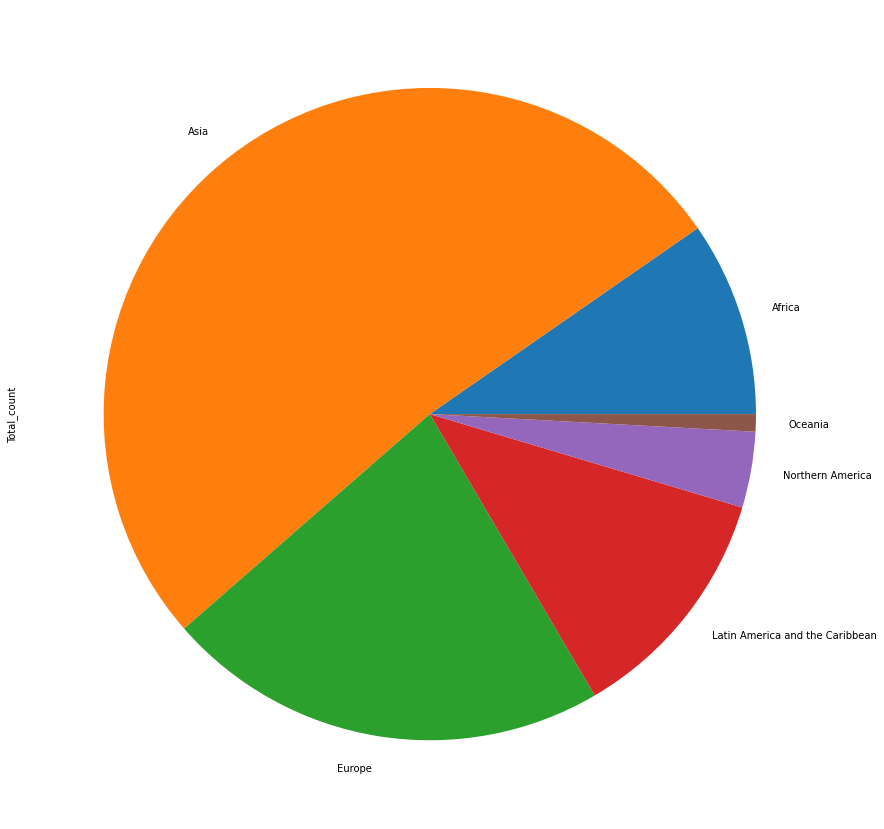

In [57]:
#baseline pie chart

df_continents['Total_count'].plot(
    kind='pie',
    figsize=(15,15)
)

**Q. By Continent-region pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.**

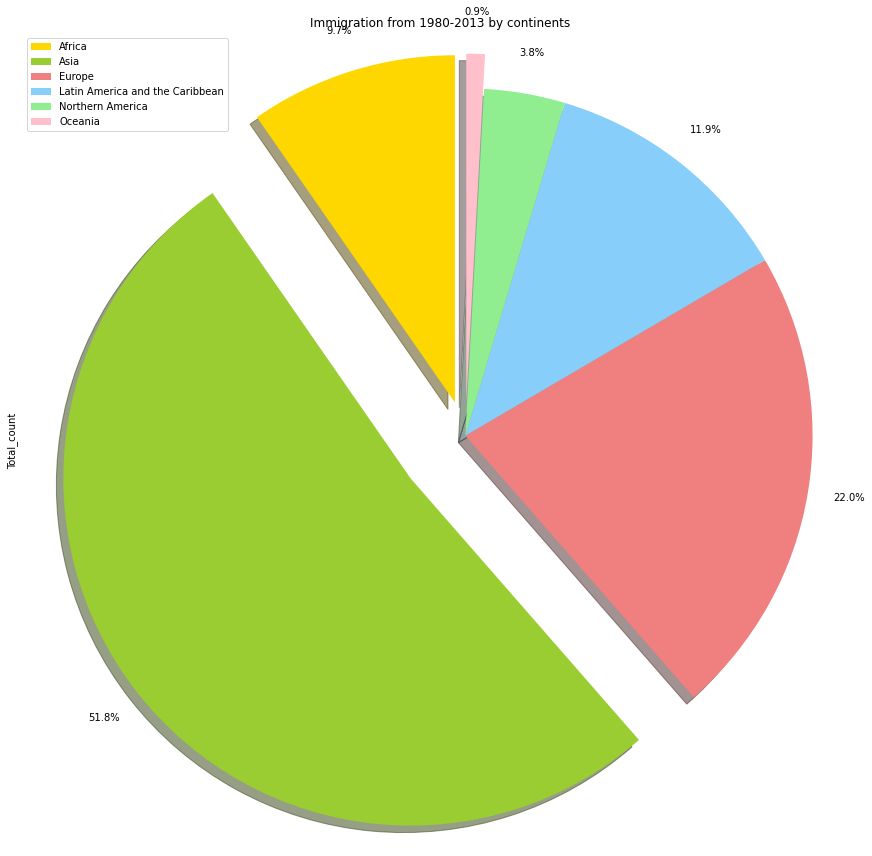

In [58]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explodelist = [0.1,0.2,0,0,0,0.1]

df_continents['Total_count'].plot(
    kind='pie',
    figsize=(15,15),
    startangle=90,
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    pctdistance=1.12, 
    colors=colors_list,
    explode=explodelist
)

plt.title('Immigration from 1980-2013 by continents')
plt.axis('equal') #pie chart looks like a circle
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

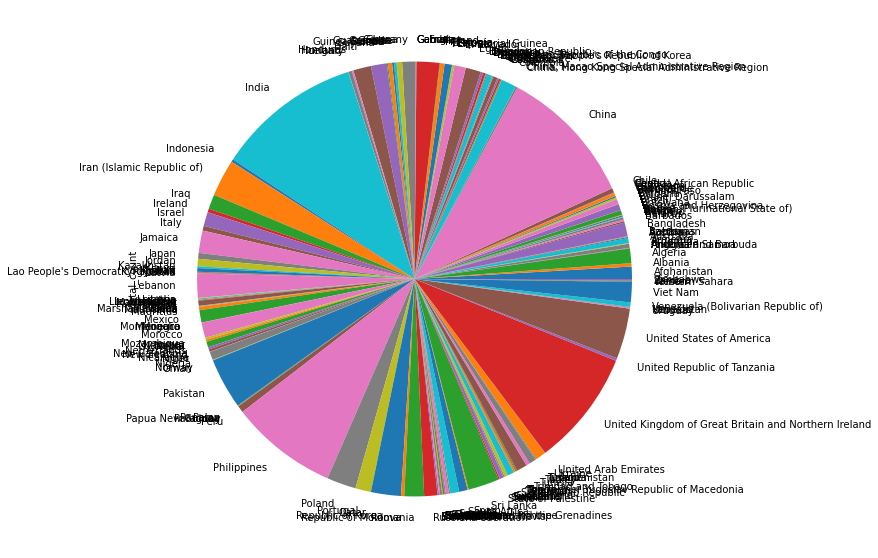

In [59]:
#create pie charts of the data

df_can['Total_count'].plot(kind='pie',
                           figsize=(10,10),
                           )

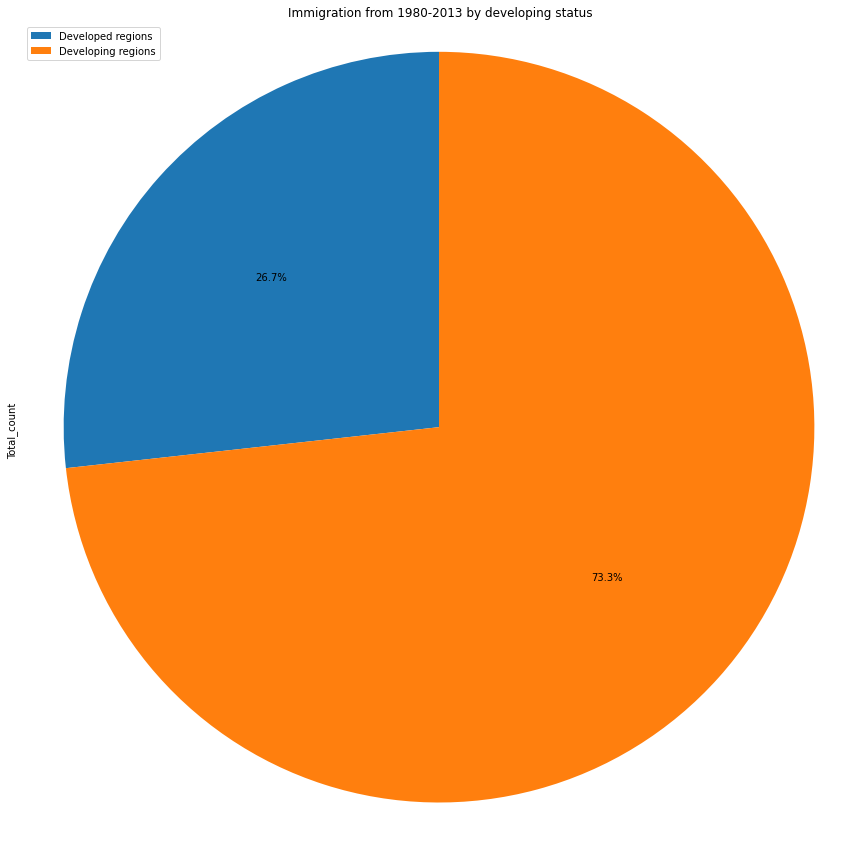

In [60]:
# plot pie chart of dev status 

df_devstatus = df_can.groupby(by='Development-status', axis='index').sum()

df_devstatus.head()


df_devstatus['Total_count'].plot(
    kind='pie',
    figsize=(15,15),
    startangle=90,
    autopct='%1.1f%%',
    shadow=False,
    labels=None
)

plt.title('Immigration from 1980-2013 by developing status')
plt.axis('equal') #pie chart looks like a circle
plt.legend(labels=df_devstatus.index, loc='upper left')
plt.show()

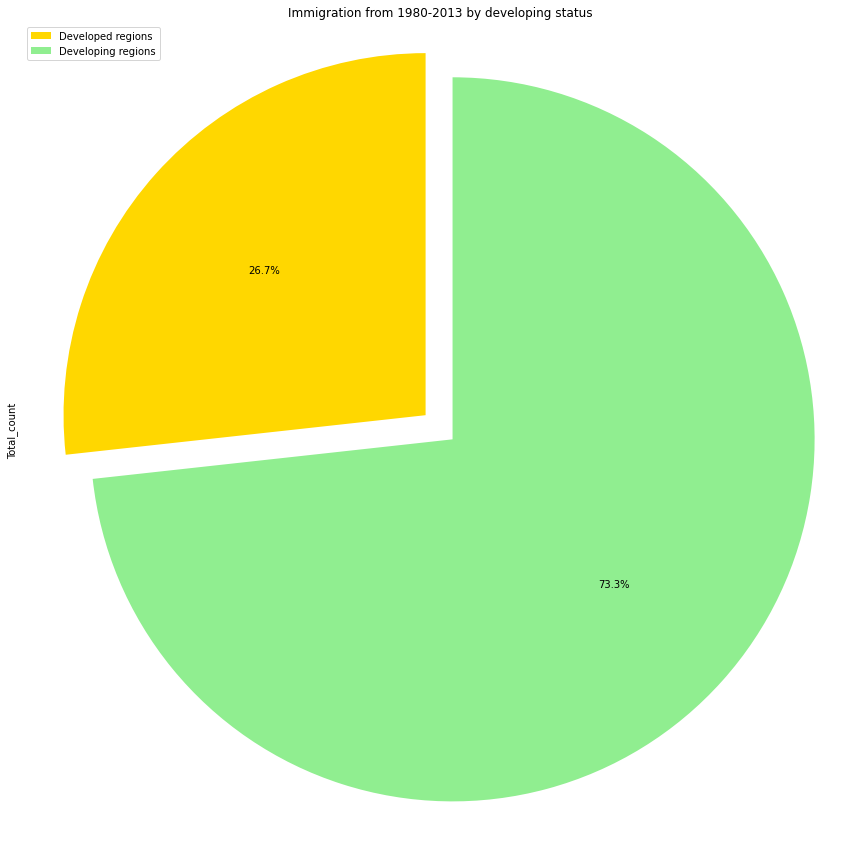

In [61]:
# plot pie chart of dev status 



colorlist = ['gold', 'lightgreen']
explodelist = [0,0.1]


df_devstatus['Total_count'].plot(
    kind='pie',
    figsize=(15,15),
    startangle=90,
    autopct='%1.1f%%',
    shadow=False,
    labels=None,
    colors=colorlist,
    explode=explodelist
)

plt.title('Immigration from 1980-2013 by developing status')
plt.axis('equal') #pie chart looks like a circle
plt.legend(labels=df_devstatus.index, loc='upper left')
plt.show()